# <font color='Blue'>Distance Metrics in Clustering Advanced</font>

## <font color='Blue'>Libary: scipy.spatial.distance</font>

<b> Available Distance Types </b>

‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

SCIPY Distances: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

SCIPY Distances: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html

## <font color='Blue'>Distance Types and Description</font>

<b> Euclidean Distance </b>

In mathematics, the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space

<b> Manhattan Distance (Aka Cityblock or Taxicab distance) </b>

The distance between two points is the sum of the absolute differences of their Cartesian coordinates

<b> Chebyshev Distance </b>

The distance between two vectors is the greatest of their differences along any coordinate dimension

<b> Cosine Distance </b>

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them

<b> Hamming Distance </b>

The proportion of those vector elements between elements that disagree

<b> Jaccard Distance </b>

The Jaccard distance is the proportion of those elements that disagree.
  
<b> Dice Distance </b>

The Dice distance is a measure of dissimilarity between boolean elements.

<b> Yule Distance </b>

The Yule distance is a measure of dissimilarity between boolean elements. 

## <font color='Blue'>Loading Libraries</font>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>Loading Data</font>

In [8]:
df = pd.read_csv( "Income Data.csv" )
df

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


## <font color='Blue'>Normalizing Features</font>

In [9]:
# Normalizing features

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["age", "income"]])
print(type(scaled_df))
scaled_df[0:5]

<class 'numpy.ndarray'>


array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

## <font color='Blue'>Calculating Distances</font>

In [35]:
euc = pdist(scaled_df , 'euclidean') # Euclidean distance
man = pdist(scaled_df , 'cityblock') # Manhattan distance
che = pdist(scaled_df , 'chebyshev') # Chebyshev distance
ham = pdist(scaled_df , 'hamming')   # Hamming distance [useful for boolean variables only]
jac = pdist(scaled_df , 'jaccard')   # Jaccard distance [useful for boolean variables only]
dic = pdist(scaled_df , 'dice')      # dice distance    [useful for boolean variables only]  

In [36]:
print("euc:","\n",euc.round(2),"\n")
print("man:","\n",man.round(2),"\n")
print("che:","\n",che.round(2),"\n")
print("ham:","\n",ham.round(2),"\n")
print("jac:","\n",jac.round(2),"\n")
print("dic:","\n",dic.round(2),"\n")

euc: 
 [2.87 0.49 1.78 ... 2.34 1.77 0.76] 

man: 
 [3.56 0.68 2.5  ... 2.98 2.45 0.93] 

che: 
 [2.75 0.42 1.37 ... 2.21 1.48 0.73] 

ham: 
 [1. 1. 1. ... 1. 1. 1.] 

jac: 
 [1. 1. 1. ... 1. 1. 1.] 

dic: 
 [0. 0. 0. ... 0. 0. 0.] 



In [37]:
type(euc)

numpy.ndarray

## <font color='Blue'>Distance Matrices</font>

In [38]:
seuc = squareform(euc)
seuc.round(2)

array([[0.  , 2.87, 0.49, ..., 2.85, 0.52, 1.26],
       [2.87, 0.  , 2.51, ..., 0.02, 2.36, 1.78],
       [0.49, 2.51, 0.  , ..., 2.5 , 0.45, 1.14],
       ...,
       [2.85, 0.02, 2.5 , ..., 0.  , 2.34, 1.77],
       [0.52, 2.36, 0.45, ..., 2.34, 0.  , 0.76],
       [1.26, 1.78, 1.14, ..., 1.77, 0.76, 0.  ]])

In [39]:
sman = squareform(man)
sman.round(2)

array([[0.  , 3.56, 0.68, ..., 3.54, 0.56, 1.41],
       [3.56, 0.  , 2.87, ..., 0.03, 3.  , 2.46],
       [0.68, 2.87, 0.  , ..., 2.86, 0.63, 1.56],
       ...,
       [3.54, 0.03, 2.86, ..., 0.  , 2.98, 2.45],
       [0.56, 3.  , 0.63, ..., 2.98, 0.  , 0.93],
       [1.41, 2.46, 1.56, ..., 2.45, 0.93, 0.  ]])

In [40]:
sche = squareform(che)
sche.round(2)

array([[0.  , 2.75, 0.42, ..., 2.73, 0.52, 1.25],
       [2.75, 0.  , 2.48, ..., 0.02, 2.23, 1.5 ],
       [0.42, 2.48, 0.  , ..., 2.46, 0.37, 0.99],
       ...,
       [2.73, 0.02, 2.46, ..., 0.  , 2.21, 1.48],
       [0.52, 2.23, 0.37, ..., 2.21, 0.  , 0.73],
       [1.25, 1.5 , 0.99, ..., 1.48, 0.73, 0.  ]])

In [41]:
sham = squareform(ham)
sham.round(2)

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [42]:
sjac = squareform(jac)
sjac.round(2)

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [43]:
sdic = squareform(dic)
sdic.round(2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## <font color='Blue'>Using Distance Matrices in Clustering</font>

In [44]:
from sklearn.cluster import DBSCAN

## <font color='Blue'>Executing Clustering - Usual Approach</font>

In [45]:
db = DBSCAN(eps=0.35, min_samples=5).fit(scaled_df)
labels = db.labels_

In [46]:
# Clusters and Noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 8


## <font color='Blue'>Validation - Silhoutte Measure</font>

In [47]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_df, labels))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.680


## <font color='Blue'>Cluster Sizes</font>

In [48]:
df["clusterid"] = labels
cluster_size = df.groupby(['clusterid']).size() 
print(cluster_size)
#Note: -1 indicates noise

clusterid
-1      8
 0    100
 1    100
 2     92
dtype: int64


## <font color='Blue'>Plotting Clusters</font>

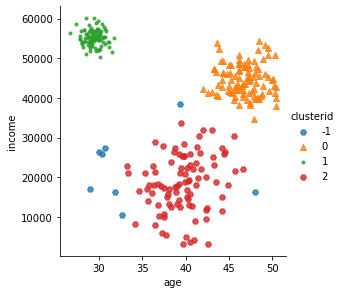

In [49]:
markers = ['H','^','.','H']
sn.lmplot( "age", "income",data=df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );

## <font color='Blue'>Executing Clustering - Using Distance Matrices</font>

Let's use distance input instead of array

Why are we learning this - It gives us more flexibility - We can calculate various distances and use it

Executing DBSCAN with precomputed distances
    add argument metric = 'precomputed'
    and instead of passing df, pass distances

In [50]:
dbd = DBSCAN(eps=0.35, min_samples=5,metric='precomputed').fit(sman) 
labelsd = dbd.labels_

# When we use pass euclidean distance matrix, it should give exactly same output as passing the array

In [51]:
# Clusters and Noise
n_clusters_ = len(set(labelsd)) - (1 if -1 in labelsd else 0)
n_noise_ = list(labelsd).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 13


## <font color='Blue'>Validation - Silhoutte Measure</font>

In [52]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_df, labelsd))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.671


## <font color='Blue'>Attaching Clusters</font>

In [54]:
df["clusterid_new"] = labelsd
cluster_size_new = df.groupby(['clusterid_new']).size() 
print(cluster_size_new)
#Note: -1 indicates noise

clusterid_new
-1     13
 0    100
 1    100
 2     87
dtype: int64


## <font color='Blue'>Plotting Clusters</font>

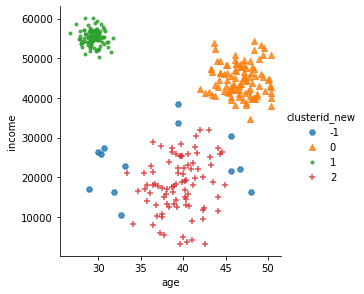

In [55]:
markers = ['H','^','.','+']
sn.lmplot( "age", "income",data=df,hue = "clusterid_new",fit_reg=False,markers = markers,size = 4 );

Repeat with various distance metrices and see what happens